# Twitter Crawling

In [ ]:
import tweepy
import csv
import pandas as pd

In [ ]:
api_key = "ro3IzZ2rrllYxRo9rFpDa9vA4"
api_secret_key = "QjbfOtVZ91YpjD2iZswIrHC6a7esx4v15RmQngyeUlTOZzzwie"
access_token = "1098143684-6NyBCoZcqB4qUXcHXNZGt03kiirxZ5Jdz6s80lH"
access_token_secret ="Xdvq9R9JUjj4E5cE6EHakBhpohAdSviuq2xp66n5jidIQ"

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
csvFile = open('DQLAB.csv','a',encoding='unicode_escape')
csvWriter = csv.writer(csvFile)
c = []
u = []
a = []
t = []

In [ ]:
for tweet in tweepy.Cursor(api.search, q='dqlab', lang='id').items(1000):
    print(tweet.created_at,tweet.user.name,tweet.author.screen_name,tweet.text)
    c.append(tweet.created_at)
    u.append(tweet.user.name)
    a.append(tweet.author.screen_name)
    t.append(tweet.text)
    tweets = [tweet.created_at, tweet.user.name, tweet.author.screen_name, tweet.text]
    csvWriter.writerow(tweets)

dictTweets = {"waktu":c, "username":u, "author":a, "teks":t}
df = pd.DataFrame(dictTweets,columns=["waktu","username","author","teks"])
df.to_csv('DQLAB.csv')

2022-02-08 06:12:58 dataintern dataintern1 @DQLab_id bootcamp nya 21 feb - 31 maret, terus ada intern nya 1 april - 1 juni

yang dipelajarin itu ada data engi… https://t.co/JKCqrO4B3R
2022-02-08 06:08:29 dataintern dataintern1 @DQLab_id ikut tes assesment nya, dapet nilai 88.33 dan potongan 90% https://t.co/IGzDz0W0Od
2022-02-07 14:19:08 Alizul panggilajazul @P693O @colorfullspidol @sbmptnfess wah kalo ngoding itu di mana² ada, banyakk banget sumbernya

youtube, udemy, co… https://t.co/gS6gQkioar
2022-02-06 12:13:14 Bunga VD bungavd @namakuwillyB @Adibay98 @worksfess @sandhikagalih @DQLab_id waah iya sering denger tentang dqlab, makasih banyak kak!
2022-02-06 11:51:32 i'll beat ur ass 3000 namakuwillyB @bungavd @Adibay98 @worksfess @sandhikagalih kak permisi, mau rekomendasi @DQLab_id , lumayan murah juga, lagi prom… https://t.co/xXmyLtyOWM
2022-02-06 08:30:37 Sarah Hailsar_a Lama2 gue jd sales dqlab aj kli y.
2022-02-05 11:52:08 Candra ARTHEMISCHAND @worksfess banyak bootcamp gratis k

# Load Dataset

In [ ]:
import pandas as pd 
import numpy as np

TWEET_DATA = pd.read_excel("/content/drive/MyDrive/SKRIPSI/Dataset bersih DQLab Sentiment (Revisi1).xlsx")
TWEET_DATA.head()

,waktu,username,author,teks,Sentiment
0,2022-03-08 07:10:20,alya,itspelledaelyea,@convomf Engga nder. Masuk kuliah bener2 0 ilm...,POS
1,2022-03-07 08:29:27,ï¸Ž ï¸Žï¸ŽTri,awakutuleksikon,Materi di DQLab kek lagi baca novel fiksi âœï...,NET
2,2022-03-06 13:34:25,Semenjana,pelakukebajikan,Sedih lah koordinator waktu gw intern di DQLab...,NET
3,2022-03-04 16:47:42,kyoumi,kyoumiaoi,Bootcamp DQLab udah ga pernah hadir lagi wkkw,NEG
4,2022-03-04 01:02:22,lala | EDUKATIF (kode diskon Eduka System),robbizidniilmaa,@airlanggafess btw aku dulu pernah ikuttt di D...,POS


# Case Folding

In [ ]:
TWEET_DATA['teks'] = TWEET_DATA['teks'].str.lower()
print('Case Folding Result : \n')
print(TWEET_DATA['teks'].head())

Case Folding Result : 

0    @convomf engga nder. masuk kuliah bener2 0 ilm...
1    materi di dqlab kek lagi baca novel fiksi âœï...
2    sedih lah koordinator waktu gw intern di dqlab...
3        bootcamp dqlab udah ga pernah hadir lagi wkkw
4    @airlanggafess btw aku dulu pernah ikuttt di d...
Name: teks, dtype: object


# Tokenizing

In [ ]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['teks'] = TWEET_DATA['teks'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['teks'] = TWEET_DATA['teks'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['teks'] = TWEET_DATA['teks'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['teks'] = TWEET_DATA['teks'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['teks'] = TWEET_DATA['teks'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['teks'] = TWEET_DATA['teks'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = TWEET_DATA['teks'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(TWEET_DATA['tweet_tokens'].head(121))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Tokenizing Result : 

0      [engga, nder, masuk, kuliah, bener, ilmu, ngod...
1      [materi, di, dqlab, kek, lagi, baca, novel, fi...
2      [sedih, lah, koordinator, waktu, gw, intern, d...
3      [bootcamp, dqlab, udah, ga, pernah, hadir, lag...
4      [btw, aku, dulu, pernah, ikuttt, di, dqlab, se...
                             ...                        
116    [my, honest, suggestion, coba, dulu, bootcamp,...
117    [skrg, dqlab, data, bangalore, sama, celerates...
118                     [coba, dqlabbinar, academy, vit]
119      [revou, dqlab, dicoding, harisenincom, eduwork]
120    [ikut, kelas, di, dqlab, udah, subscribe, dari...
Name: tweet_tokens, Length: 121, dtype: object


# Normalization

In [ ]:
normalizad_word = pd.read_csv("/content/drive/MyDrive/SKRIPSI/formalizationDict (Revisi)e.txt",delimiter='\t')
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens'].apply(normalized_term)

TWEET_DATA['tweet_normalized'].head(21)

0     [tidak, teman, masuk, kuliah, benar, ilmu, men...
1     [materi, di, dqlab, seperti, lagi, baca, novel...
2     [sedih, lah, koordinator, waktu, saya, magang,...
3     [bootcamp, dqlab, sudah, tidak, pernah, hadir,...
4     [ngomong-ngomong, aku, dulu, pernah, ikut, di,...
5     [kemarin, langsung, bisa, saja, tapi, beda, ma...
6                                 [dqlab, lagi, diskon]
7                             [dqlab, bisa, ai, kaggle]
8     [ada, yang, pakai, dqlab, dan, punya, channel,...
9     [digitalent, komunikasi dan informasi, yang, f...
10    [halo, maaf, ikutan, iya, kak, menurut, aku, l...
11    [confess, coba, ikut, mata kuliah, transformas...
12    [mempersiapkan, kompetensi, calon, talenta, da...
13                                     [kerjaan, dqlab]
14         [fuck, jadi, ingat, belum, lanjutkan, dqlab]
15    [pelatihan, data, science, gratis, yang, dilak...
16    [ayo, ikut, try out, profesional, academi, dig...
17    [dqlab, salah, satu, platform, edukasi, on

# Stopword

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'kakk', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'ku',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'mu,', 'nyaaaaa',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'nyaa',
                       '&amp', 'yah', 'id', 'johnny', 'plate','mada','ayo','cb','iykra','tertawa','nyi'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("/content/drive/MyDrive/SKRIPSI/Stopword.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_normalized'].apply(stopwords_removal) 


print(TWEET_DATA['tweet_tokens_WSW'].head(21))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
0     [teman, kuliah, ilmu, mengoding, tenang, diaja...
1                   [materi, dqlab, baca, novel, fiksi]
2     [sedih, koordinator, magang, dqlab, pamit, undur]
3                              [bootcamp, dqlab, hadir]
4                [ngomong-ngomong, dqlab, seru, banget]
5     [kemarin, beda, materi, data, engineering, dqlab]
6                                       [dqlab, diskon]
7                                       [dqlab, kaggle]
8     [pakai, dqlab, channel, diskusi, channel, resm...
9     [digitalent, komunikasi dan informasi, fresh g...
10          [maaf, ikutan, layak, praktek, coding, web]
11    [confess, coba, mata kuliah, transformasi digi...
12    [kompetensi, calon, talenta, data, menghadapi,...
13                                     [kerjaan, dqlab]
14                             [fuck, lanjutkan, dqlab]
15    [pelatihan, data, science, gratis, dqlab, b

In [ ]:
TWEET_DATA.head(21)

,waktu,username,author,teks,Sentiment,tweet_tokens,tweet_normalized,tweet_tokens_WSW
0,2022-03-08 07:10:20,alya,itspelledaelyea,engga nder masuk kuliah bener ilmu ngodingnya ...,POS,"[engga, nder, masuk, kuliah, bener, ilmu, ngod...","[tidak, teman, masuk, kuliah, benar, ilmu, men...","[teman, kuliah, ilmu, mengoding, tenang, diaja..."
1,2022-03-07 08:29:27,ï¸Ž ï¸Žï¸ŽTri,awakutuleksikon,materi di dqlab kek lagi baca novel fiksi,NET,"[materi, di, dqlab, kek, lagi, baca, novel, fi...","[materi, di, dqlab, seperti, lagi, baca, novel...","[materi, dqlab, baca, novel, fiksi]"
2,2022-03-06 13:34:25,Semenjana,pelakukebajikan,sedih lah koordinator waktu gw intern di dqlab...,NET,"[sedih, lah, koordinator, waktu, gw, intern, d...","[sedih, lah, koordinator, waktu, saya, magang,...","[sedih, koordinator, magang, dqlab, pamit, undur]"
3,2022-03-04 16:47:42,kyoumi,kyoumiaoi,bootcamp dqlab udah ga pernah hadir lagi wkkw,NEG,"[bootcamp, dqlab, udah, ga, pernah, hadir, lag...","[bootcamp, dqlab, sudah, tidak, pernah, hadir,...","[bootcamp, dqlab, hadir]"
4,2022-03-04 01:02:22,lala | EDUKATIF (kode diskon Eduka System),robbizidniilmaa,btw aku dulu pernah ikuttt di dqlab seru bgt,POS,"[btw, aku, dulu, pernah, ikuttt, di, dqlab, se...","[ngomong-ngomong, aku, dulu, pernah, ikut, di,...","[ngomong-ngomong, dqlab, seru, banget]"
5,2022-03-01 09:30:18,Didik,ahmaddidiks_,kemarin lgsung bisa si tp beda course mas aku ...,POS,"[kemarin, lgsung, bisa, si, tp, beda, course, ...","[kemarin, langsung, bisa, saja, tapi, beda, ma...","[kemarin, beda, materi, data, engineering, dqlab]"
6,2022-03-01 00:17:09,Dappp,dhaffaabdillah,dqlab lagi diskon,POS,"[dqlab, lagi, diskon]","[dqlab, lagi, diskon]","[dqlab, diskon]"
7,2022-02-27 06:07:49,Khai,khaireads,dqlab bisa ai kaggle,NET,"[dqlab, bisa, ai, kaggle]","[dqlab, bisa, ai, kaggle]","[dqlab, kaggle]"
8,2022-02-25 15:48:46,Acha ðŸŒ¿,kvrsgesagt,ada yang pake dqlab dan punya channel discuss ...,NET,"[ada, yang, pake, dqlab, dan, punya, channel, ...","[ada, yang, pakai, dqlab, dan, punya, channel,...","[pakai, dqlab, channel, diskusi, channel, resm..."
9,2022-02-24 08:54:19,Petrichor1717,pluviophile171,digitalent kominfo yg fga gratis tp ga disalur...,NET,"[digitalent, kominfo, yg, fga, gratis, tp, ga,...","[digitalent, komunikasi dan informasi, yang, f...","[digitalent, komunikasi dan informasi, fresh g..."


#Stemming

In [ ]:
pip install PySastrawi

     |████████████████████████████████| 210 kB 5.0 MB/s 


In [ ]:
pip install swifter

     |████████████████████████████████| 647 kB 5.3 MB/s 
     |████████████████████████████████| 280 kB 52.9 MB/s 
     |████████████████████████████████| 136 kB 65.9 MB/s 
  Created wheel for swifter: filename=swifter-1.1.3-py3-none-any.whl size=13078 sha256=d1249b4b4d60a1815f3fbe7aff0f0ff5e54aea7e62fd756c5d964312ea5eaae6
  Stored in directory: /root/.cache/pip/wheels/e8/1a/1b/46aa7b0fac16d3ce1bccaac14bfe4fad972642217ae78d8160
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['tweet_tokens_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['tweet_tokens_WSW'].swifter.apply(get_stemmed_term)
print(TWEET_DATA['tweet_tokens_stemmed'])

533
------------------------
teman : teman
kuliah : kuliah
ilmu : ilmu
mengoding : mengoding
tenang : tenang
diajari : ajar
banget : banget
dasar : dasar
kakak : kakak
materi : materi
dqlab : dqlab
baca : baca
novel : novel
fiksi : fiksi
sedih : sedih
koordinator : koordinator
magang : magang
pamit : pamit
undur : undur
bootcamp : bootcamp
hadir : hadir
ngomong-ngomong : ngomong-ngomong
seru : seru
kemarin : kemarin
beda : beda
data : data
engineering : engineering
diskon : diskon
kaggle : kaggle
pakai : pakai
channel : channel
diskusi : diskusi
resmi : resmi
informasi : informasi
butuh : butuh
bantuan : bantu
digitalent : digitalent
komunikasi dan informasi : komunikasi dan informasi
fresh graduate academy : fresh graduate academy
gratis : gratis
disalurkan : salur
kerja : kerja
murah meriah : murah riah
revou : revou
maaf : maaf
ikutan : ikut
layak : layak
praktek : praktek
coding : coding
web : web
confess : confess
coba : coba
mata kuliah : mata kuliah
transformasi digital : transf

Pandas Apply:   0%|          | 0/160 [00:00<?, ?it/s]

0      [teman, kuliah, ilmu, mengoding, tenang, ajar,...
1                    [materi, dqlab, baca, novel, fiksi]
2      [sedih, koordinator, magang, dqlab, pamit, undur]
3                               [bootcamp, dqlab, hadir]
4                 [ngomong-ngomong, dqlab, seru, banget]
                             ...                        
155    [progate, dicoding, freecodecamp, kaggle, dqla...
156    [datacamp, beli, tokopedia, langgan, murah, ka...
157                            [coba, rekomendasi, mula]
158                              [progate, dqlab, udemy]
159    [coba, ajar, machine learning, rata, materi, c...
Name: tweet_tokens_stemmed, Length: 160, dtype: object


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Stich Back

In [ ]:
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
TWEET_DATA['Tweet'] = TWEET_DATA['tweet_tokens_stemmed'].apply(lambda x: remove_punct(x))
TWEET_DATA.head()

,waktu,username,author,teks,Sentiment,tweet_tokens,tweet_normalized,tweet_tokens_WSW,tweet_tokens_stemmed,Tweet
0,2022-03-08 07:10:20,alya,itspelledaelyea,engga nder masuk kuliah bener ilmu ngodingnya ...,POS,"[engga, nder, masuk, kuliah, bener, ilmu, ngod...","[tidak, teman, masuk, kuliah, benar, ilmu, men...","[teman, kuliah, ilmu, mengoding, tenang, diaja...","[teman, kuliah, ilmu, mengoding, tenang, ajar,...",teman kuliah ilmu mengoding tenang ajar banget...
1,2022-03-07 08:29:27,ï¸Ž ï¸Žï¸ŽTri,awakutuleksikon,materi di dqlab kek lagi baca novel fiksi,NET,"[materi, di, dqlab, kek, lagi, baca, novel, fi...","[materi, di, dqlab, seperti, lagi, baca, novel...","[materi, dqlab, baca, novel, fiksi]","[materi, dqlab, baca, novel, fiksi]",materi dqlab baca novel fiksi
2,2022-03-06 13:34:25,Semenjana,pelakukebajikan,sedih lah koordinator waktu gw intern di dqlab...,NET,"[sedih, lah, koordinator, waktu, gw, intern, d...","[sedih, lah, koordinator, waktu, saya, magang,...","[sedih, koordinator, magang, dqlab, pamit, undur]","[sedih, koordinator, magang, dqlab, pamit, undur]",sedih koordinator magang dqlab pamit undur
3,2022-03-04 16:47:42,kyoumi,kyoumiaoi,bootcamp dqlab udah ga pernah hadir lagi wkkw,NEG,"[bootcamp, dqlab, udah, ga, pernah, hadir, lag...","[bootcamp, dqlab, sudah, tidak, pernah, hadir,...","[bootcamp, dqlab, hadir]","[bootcamp, dqlab, hadir]",bootcamp dqlab hadir
4,2022-03-04 01:02:22,lala | EDUKATIF (kode diskon Eduka System),robbizidniilmaa,btw aku dulu pernah ikuttt di dqlab seru bgt,POS,"[btw, aku, dulu, pernah, ikuttt, di, dqlab, se...","[ngomong-ngomong, aku, dulu, pernah, ikut, di,...","[ngomong-ngomong, dqlab, seru, banget]","[ngomong-ngomong, dqlab, seru, banget]",ngomong-ngomong dqlab seru banget


# Save File

In [ ]:
TWEET_DATA.to_csv("Text_Preprocessing_DQLab5.csv")

# Wordcloud

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud

In [ ]:
Twit = pd.read_csv('/content/drive/MyDrive/SKRIPSI/Text_Preprocessing_DQLab5.csv')

In [ ]:
Twit.columns

Index(['Unnamed: 0', 'waktu', 'username', 'author', 'teks', 'Sentiment',
       'tweet_tokens', 'tweet_normalized', 'tweet_tokens_WSW',
       'tweet_tokens_stemmed', 'Tweet'],
      dtype='object')

In [ ]:
all_words = ' '.join([text for text in TWEET_DATA['Tweet']])

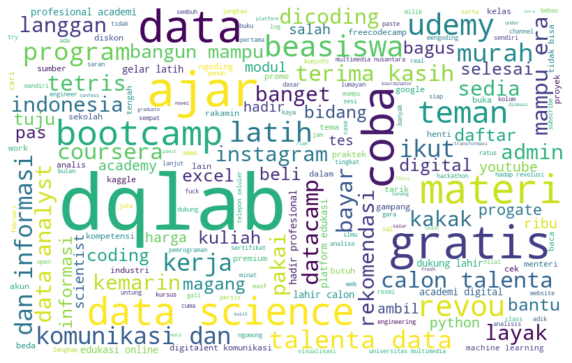

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Sentiment Positif

In [ ]:
all_words1 = ' '.join([str(text) for text in Twit['Tweet'][Twit['Sentiment']=='POS']])

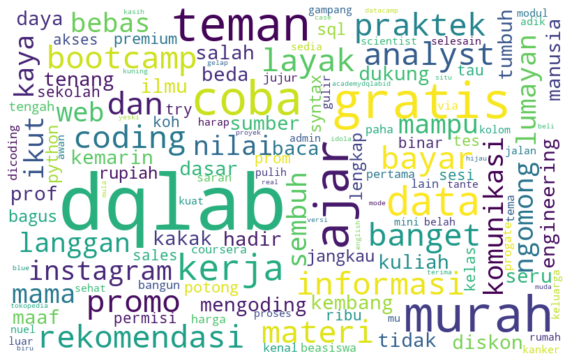

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Sentiment Netral

In [ ]:
all_words2 = ' '.join([str(text) for text in Twit['Tweet'][Twit['Sentiment']=='NET']])

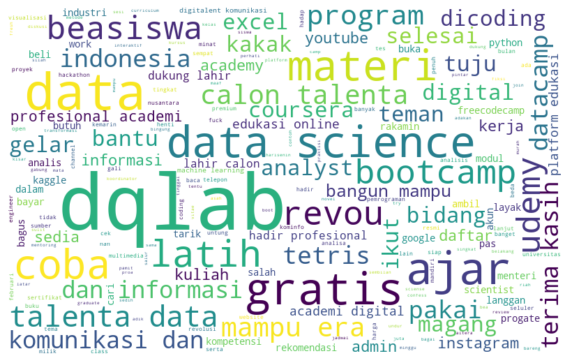

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Sentiment Negatif

In [ ]:
all_words3 = ' '.join([str(text) for text in Twit['Tweet'][Twit['Sentiment']=='NEG']])

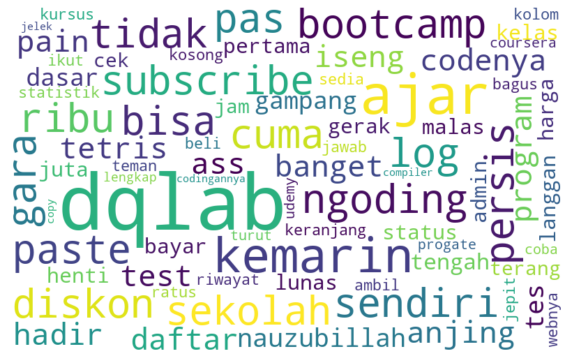

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words3)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()